# Zadanie 1
Korzystając ze wzoru na prawdopodobieństwo a posteriori w przypadku naiwnego klasyfikatora Bayesa: $p(1|x)∝π_1 p(x|1) =π_1p(x|1)p(y|1)$ przy założeniu, że gęstość prawdopodobieństwa w poszczególnych klasach jest opisywana rozkładem Gaussa, wykazać równoważność pomiędzy tym podejściem a rezultatami otrzymanymi za pomocą funkcji drawparti() w przypadku obserwacji spełniających następujące cechy:

-> Są dwie klasy

-> w klasie "1" 40 obserwacji a w klasie "2" - 30 z rozkładu normalnego o macierzy $S = \begin{pmatrix} 4 & 0 \\ 0 & 4 \end{pmatrix}$

-> średnie w klasach to: $m_1 = \begin{pmatrix}-3 \\ -1\end{pmatrix}$ i $m_2 = \begin{pmatrix}2\\2 \end{pmatrix}$


Wykreślić odpowiedni rysunek.


Referencje:

http://if.pw.edu.pl/~julas/LSED/lsed2.html#NB

http://if.pw.edu.pl/~julas/SED/pliki/SED2.pdf

In [1]:
#Importuję niezbędne biblioteki
import numpy as np
from math import log
from math import sqrt
from math import exp
from math import pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

#Implementuję dane
m1_x1, m1_x2 = -3, -1
m2_x1, m2_x2 = 2, 2

S = np.array([[4,0], [0,4]])

k1 = np.array([[np.random.normal(m1_x1, S[0][0]), np.random.normal(m1_x2, S[1][1])] for i in range(40)])
k2 = np.array([[np.random.normal(m2_x1, S[0][0]), np.random.normal(m2_x2, S[1][1])] for i in range(30)])

Poniżej wyznaczono wektory wartości X1 i X2 oraz prawdopodobieństwa a priori: $\Pi_k = \frac{n_k}{n}$, gdzie $n_k$ oznacza liczność elementów klasy "k" w próbie uczącej, a $n$-całkowitą liczność grupy. 

In [2]:
#Stworzę wektory wartości X1 i X2
X1 = np.concatenate(([i[0] for i in k1], [i[0] for i in k2]))
X2 = np.concatenate(([i[1] for i in k1], [i[1] for i in k2]))

#Przypisuję odpowiednie klasy
classes = np.concatenate((np.repeat(1, len(k1)), np.repeat(2, len(k2))))

#Estymuję prawdopodobieństwa a priori
n = len(k1)+len(k2)
pi_1 = len(k1)/n
pi_2 = len(k2)/n

#### Wyznaczanie prawdopodobieństw składowych:
Prawdopodobieństwa zmiennych $P(x_i=l | k)$ można wyznaczyć przypisując im wartość odpowiadającą prawdopodobieństwu z rozkładu normalnego, ponieważ zakładamy że z takiego rozkładu pochodzą(i de facto tak je właśnie wygenerowano). Dlatego: $P(x_i=l|k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} e^{\frac{(l-\mu_k)^2}{2\sigma_k^2}}$. 

Poniżej wyznaczoną klasę przypisano zgodnie z równaniem: $ln\frac{\Pi_1}{\Pi_2} + ln\frac{P(x_1=l|1)}{P(x_1=l|2} + ln\frac{P(x_2=l|1)}{P(x_2|2)} > 0$. Jeśli jest ono prawdziwe dany wektor zostanie przypisany do klasy 1, jeśli nie - do klasy 2.


Poniżej zdefiniuję funkcję klasyfikującą.

In [3]:
#Funkcja klasyfikująca:
def clasify(_x1, _x2):
    addend1 = log(pi_1/pi_2)
    
    def gauss_prob(val, mu, sig):
        return (1/sqrt(2*pi*(sig**2)))*exp( -((val-mu)**2) / (2*(sig**2) ) )
    
    addend2 = log(gauss_prob(_x1, m1_x1, S[0][0])/gauss_prob(_x1, m2_x1, S[0][0]))
    addend3 = log(gauss_prob(_x2, m1_x2, S[1][1])/gauss_prob(_x2, m2_x2, S[1][1]))
    
    result = addend1+addend2+addend3
    
    if result > 0:
        return 1
    else:
        return 2

In [4]:
new_classes = np.array([clasify(X1[i], X2[i]) for i in range(len(classes))])
accuracy = len([classes[i] for i in range(len(classes)) if classes[i] == new_classes[i]]) / len(classes)
print("Trafnie przydzielone klasy: {0:.2f}%".format(accuracy*100))

Trafnie przydzielone klasy: 75.71%


### Wykresy:
Wyznaczone klasy przedstawię na wykresie z rozróżnieniem na poprawnie i niepoprawnie sklasyfikowane.

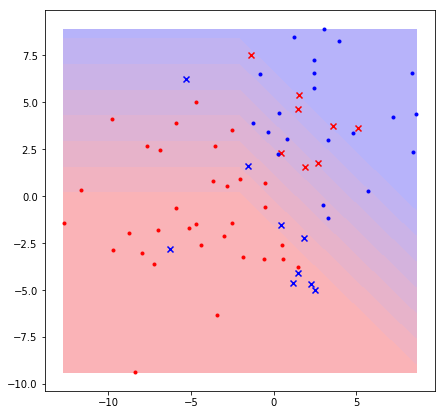

In [5]:
fig = plt.figure(figsize = (7,7))

# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

#Współrzędne punktów:
tp = (classes==new_classes) #wektor przechowujący informację o poprawnie/niepoprawnie sklasyfikowanych wektorach
#K1:
tp_k1_X1, tp_k1_X2 = X1[tp & classes==1], X2[tp & classes==1]
fp_k1_X1, fp_k1_X2 = X1[~tp & classes==1], X2[~tp & classes==1]
#K2:
tp_k2_X1, tp_k2_X2 = X1[tp & (classes==2)], X2[tp & (classes==2)]
fp_k2_X1, fp_k2_X2 = X1[~tp & (classes==2)], X2[~tp & (classes==2)]


#Tło klas:
nx, ny = 300, 300 #"rozdzielczość" w osi X i Y
x_min, x_max = X1.min(), X1.max()
y_min, y_max = X2.min(), X2.max()
x = np.linspace(x_min, x_max, num=3)
y = np.linspace(y_min, y_max, num=3)
xx, yy = np.meshgrid(x, y)
z = np.array([])
for i in x:
    z = np.append(z, [clasify(i, y[j]) for j in range(len(y))])
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z, cmap='red_blue_classes')

#Rysowanie punktów:
#K1:
plt.scatter(tp_k1_X1, tp_k1_X2, marker=".", color='red')
plt.scatter(fp_k1_X1, fp_k1_X2, marker="x", color='red')
#K2:
plt.scatter(tp_k2_X1, tp_k2_X2, marker=".", color='blue')
plt.scatter(fp_k2_X1, fp_k2_X2, marker="x", color='blue')

Niestety nie udało mi się poprawnie zwizualizować krzywej, natomiast widać które elementy zostały przydzielone poprawnie (kropki), a które nie (krzyżyki). Być może źle tworzę zmienną "z".

### Metoda GaussianNB

W następnych linijkach postaram się przedstawić równoważność powyższej metody z gotową metodą GaussianNB. 

In [6]:
#Tworzę wektor X:
X = np.concatenate((k1,k2))
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, classes)
#Nowe klasy wg. funkcji GaussianNB
gaussNB_classes = clf.predict(X)
accuracy = (gaussNB_classes == classes)
compare = (gaussNB_classes == new_classes)
print("Trafność w porównaniu z prawdziwymi klasami: {:.2f}%".format(len(classes[accuracy])/len(classes)*100))
print("Porównanie przypisania wg ręcznej metody i gaussNB: {:.2f}%".format(len(classes[compare])/len(classes)*100))

Trafność w porównaniu z prawdziwymi klasami: 78.57%
Porównanie przypisania wg ręcznej metody i gaussNB: 94.29%


Rozbieżność między metodą "na piechotę" a metodą GaussianNB może wynikać z estymacji parametrów rozkładu normalnego przez gotową metodę. Nie mniej ich skuteczność jest bardzo podobna.

Poniżej wizualizacja wyników metody GaussianNB:

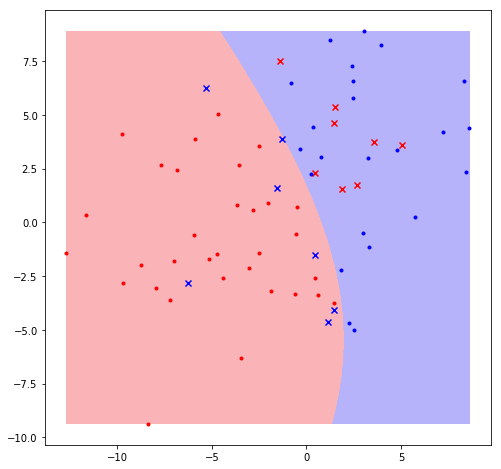

In [8]:
fig = plt.figure(figsize = (8,8))
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
#Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = cmap)
tp = (classes == gaussNB_classes)
plt.scatter(X[:,0][(classes==1) & tp], X[:,1][(classes==1) & tp], marker=".", color='red')
plt.scatter(X[:,0][(classes==1) & (~tp)], X[:,1][(classes==1) & ~tp], marker="x", color='red')
plt.scatter(X[:,0][(classes==2) & tp], X[:,1][(classes==2) & tp], marker=".", color='blue')
plt.scatter(X[:,0][(classes==2) & (~tp)], X[:,1][(classes==2) & ~tp], marker="x", color='blue')